In [73]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
input_df = pd.read_csv('./input/train.tsv',sep='\t')

In [5]:
input_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [51]:
input_df['item_description'].describe()

count                1482531
unique               1281426
top       No description yet
freq                   82489
Name: item_description, dtype: object

In [43]:
cat = 'Men/Tops/T-shirts'

def split_categories(category):
     try:
        categories = category.split('/')
        cat1, cat2, cat3 = tuple(categories)
        return cat1, cat2, cat3
     except:
        cat1, cat2, cat3 = ('','','')
        return cat1, cat2, cat3

def get_category(category):
    return split_categories(category)[0]
    
def get_sub_category(category):
    return split_categories(category)[1]      

def get_sub_sub_category(category):
    return split_categories(category)[2]   

In [88]:
features_df = input_df[['item_condition_id','price','shipping','brand_name']]
features_df['category'] = input_df['category_name'].apply(get_category)
features_df['sub_category'] = input_df['category_name'].apply(get_sub_category)
features_df['sub_sub_category'] = input_df['category_name'].apply(get_sub_sub_category)

/Users/labibfawaz/anaconda/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/labibfawaz/anaconda/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/labibfawaz/anaconda/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [89]:
def to_str_len(var):
     return len(str(var))

features_df['description_len'] = input_df['item_description'].apply(to_str_len)




In [90]:
features_df.head()

,item_condition_id,price,shipping,brand_name,category,sub_category,sub_sub_category,description_len
0,3,10.0,1,NaN,Men,Tops,T-shirts,18
1,3,52.0,0,Razer,Electronics,Computers & Tablets,Components & Parts,188
2,1,10.0,1,Target,Women,Tops & Blouses,Blouse,124
3,1,35.0,1,NaN,Home,Home Décor,Home Décor Accents,173
4,1,44.0,0,NaN,Women,Jewelry,Necklaces,41


In [71]:
x = features_df['price']
y = features_df['description_len']

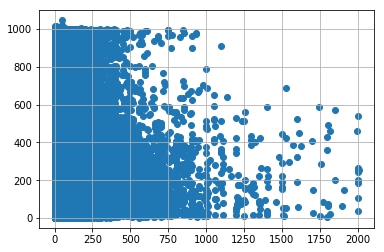

In [75]:
plt.scatter(x,y)
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1af77e9710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1b049d2780>]], dtype=object)

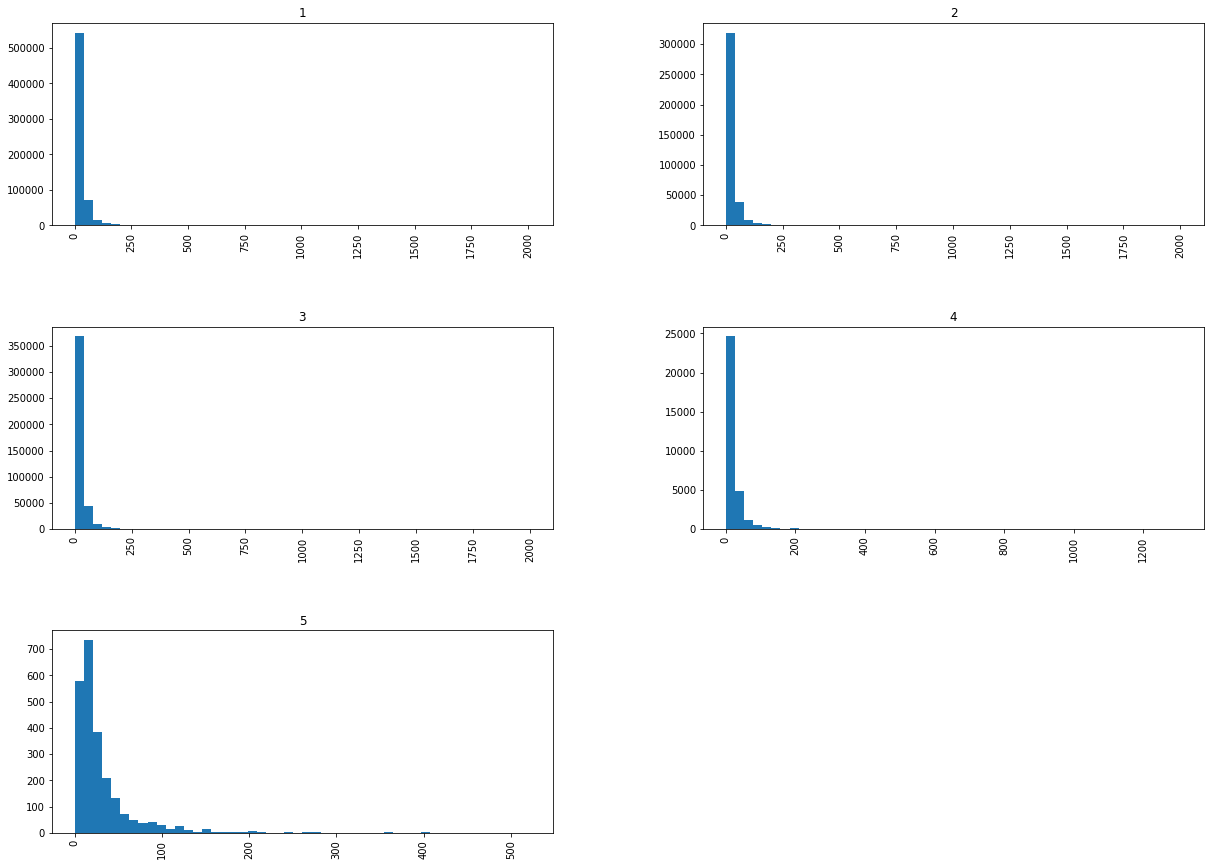

In [96]:
features_df.hist(column='price', by='item_condition_id',bins=50,figsize=(20,15))

In [86]:
features_df[['price','category']].groupby('category').describe()

price                                               \
                           count       mean        std  min   25%   50%   75%   
category                                                                        
                         10716.0  39.571855  63.663811  0.0  12.0  21.0  40.0   
Beauty                  207828.0  19.671536  21.360135  0.0  10.0  15.0  24.0   
Electronics             119631.0  34.191769  64.037637  0.0   9.0  15.0  30.0   
Handmade                 30840.0  18.154410  27.756418  0.0   6.0  12.0  20.0   
Home                     67871.0  24.536599  24.417061  0.0  12.0  18.0  29.0   
Kids                    171689.0  20.642315  22.730876  0.0  10.0  14.0  24.0   
Men                      93363.0  34.693347  41.264184  0.0  14.0  21.0  40.0   
Other                    45351.0  20.809817  29.847758  0.0   9.0  14.0  23.0   
Sports & Outdoors        24331.0  25.534565  29.324018  0.0  11.0  16.0  28.0   
Vintage & Collectibles   46530.0  27.339426  53.507495  0.0  10.0  16.0  27.0   
Women                   664385.0  28.885496  39.443853  0.0  12.0  19.0  33.0   

                                
                           max  
category                        
                        1900.0  
Beauty                  2000.0  
Electronics             1909.0  
Handmade                1750.0  
Home                     848.0  
Kids                     809.0  
Men                     1309.0  
Other                   1400.0  
Sports & Outdoors        915.0  
Vintage & Collectibles  1709.0  
Women                   2009.0

In [87]:
features_df[['description_len','category']].groupby('category').describe()

description_len                                     \
                                 count        mean         std  min   25%   
category                                                                    
                               10716.0  143.513998  162.949431  1.0  40.0   
Beauty                        207828.0  188.254244  217.759338  1.0  47.0   
Electronics                   119631.0  187.232431  226.989550  1.0  40.0   
Handmade                       30840.0  200.069034  214.997976  1.0  51.0   
Home                           67871.0  160.090186  194.560500  1.0  35.0   
Kids                          171689.0  123.398593  145.305174  1.0  36.0   
Men                            93363.0  110.867324  129.229525  1.0  33.0   
Other                          45351.0  195.856651  232.221264  1.0  43.0   
Sports & Outdoors              24331.0  174.144548  218.769833  1.0  42.0   
Vintage & Collectibles         46530.0  152.009972  187.461824  1.0  39.0   
Women                         664385.0  126.727541  140.564595  1.0  39.0   

                                              
                          50%    75%     max  
category                                      
                         92.0  180.0  1010.0  
Beauty                  104.0  233.0  1018.0  
Electronics              98.0  225.0  1002.0  
Handmade                118.0  266.0  1046.0  
Home                     88.0  197.0  1010.0  
Kids                     77.0  151.0  1000.0  
Men                      70.0  134.0  1003.0  
Other                   101.0  249.0  1021.0  
Sports & Outdoors        89.0  196.0  1010.0  
Vintage & Collectibles   86.0  180.0  1007.0  
Women                    82.0  158.0  1008.0

In [92]:
print(1)

1
